In [21]:
import wave
import numpy as np
from scipy.io.wavfile import read, write
import matplotlib.pyplot as plt
import math

C:\Users\Dell\AppData\Local\Temp/ipykernel_7320/1634625543.py:18: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  wave_data = np.fromstring(str_data, dtype = np.short)


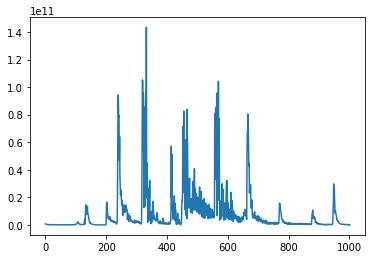

In [41]:
def cal_energy(wave_data):
    energy = []
    sum = 0
    for i in range(len(wave_data)):
        sum+= int(wave_data[i])*int(wave_data[i])
        if (i+1)%256 == 0:
            energy.append(sum)
            sum = 0
        elif i == len(wave_data) - 1:
            energy.append(sum)
    return energy

f = wave.open("D:/babu/s2.wav", "rb")
param = f.getparams()
nchannels, sampwid, framerate, nframes = param[:4]
str_data = f.readframes(nframes)
str_data = np.frombuffer(str_data, dtype = 'int16')
wave_data = np.fromstring(str_data, dtype = np.short)
energy = cal_energy(wave_data)
plt.plot(energy)

# frame

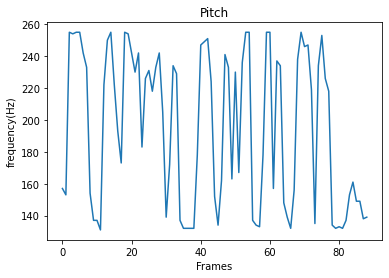

In [43]:
FRAME_SIZE = 1024
def ProcessFrame(frame, Fs):
    freq = max(frame)
    return freq
Fs, data = read('D:/babu/taunt.wav')
numFrames = int(len(data) / FRAME_SIZE)
frequencies = np.zeros(numFrames)
for i in range(numFrames):
    frame = data[i * FRAME_SIZE : (i + 1) * FRAME_SIZE]
    frequencies[i] = ProcessFrame(frame.astype(float), Fs)
plt.figure()
plt.plot(frequencies)
plt.axis('tight')
plt.xlabel('Frames')
plt.ylabel('frequency(Hz)')
plt.title('Pitch')
plt.show()

# ZCR

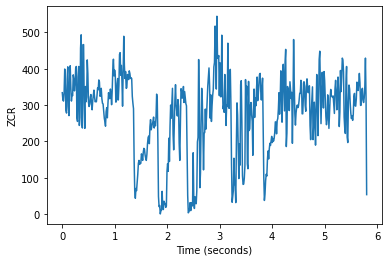

In [45]:
def ZeroCR(waveData,frameSize,overlap):
    wlen = len(waveData)
    step = frameSize - overlap
    frameNum = math.ceil(wlen/step)
    zcr = np.zeros((frameNum,1))
    for i in range(frameNum):
        curFrame = waveData[np.arange(i*step,min(i*step+frameSize,wlen))]
        curFrame = curFrame - np.mean(curFrame)
        zcr[i] = sum(curFrame[0:-1]*curFrame[1::]<=0)
    return zcr

overlap = 512
wave_data.shape = -1, 1
f_rate = f.getframerate()
zcr = ZeroCR(wave_data,FRAME_SIZE,overlap)
time2 = np.arange(0, len(zcr)) * (len(wave_data)/len(zcr) / f_rate)
plt.plot(time2, zcr)
plt.ylabel('ZCR')
plt.xlabel('Time (seconds)')
plt.show()